In [240]:

# https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
    
import sys
import math

# !{sys.executable} -m pip install --upgrade pip

try:
    import numpy as np
except ModuleNotFoundError:
    !{sys.executable} -m pip install numpy
    import numpy as np
    

try:
    import pandas as pd
except ModuleNotFoundError:
    !{sys.executable} -m pip install pandas
    import pandas as pd

    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt

    
try:
    import scipy
    import scipy.io
except ModuleNotFoundError:
    !{sys.executable} -m pip install scipy
    import scipy

        
try:
    import sklearn
except ModuleNotFoundError:
    !{sys.executable} -m pip install sklearn
    import sklearn

try:
    import mat4py
except ModuleNotFoundError:
    !{sys.executable} -m pip install mat4py
    import mat4py


In [241]:

"""
Make plot outputs appear and be stored within the notebook
"""
%matplotlib inline

"""
fix random seed for reproducibility
"""
np.random.seed(7)

In [242]:
X = pd.read_csv("dataset_DC.csv", header=None)
y = pd.read_csv("Category_DC.csv", header=None)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)  

In [243]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,-0.007724,-0.006122,-0.005285,-0.005221,-0.006342,-0.007066,-0.002987,0.003820,0.009387,0.013969,...,-0.029494,-0.022381,-0.015981,-0.011685,-0.010893,-0.012141,-0.012133,-0.007715,-0.000397,0.005205
std,0.215217,0.214373,0.215473,0.217241,0.218041,0.219355,0.221008,0.223998,0.226994,0.227968,...,0.234372,0.234985,0.233048,0.230617,0.233509,0.236715,0.234184,0.230327,0.226044,0.222619
min,-0.659863,-0.614501,-0.654126,-0.738283,-0.787589,-0.758860,-0.698816,-0.713025,-0.702061,-0.597129,...,-0.675635,-0.711380,-0.726054,-0.682928,-0.750084,-0.678019,-0.746560,-0.691021,-0.653802,-0.662998
25%,-0.160280,-0.153483,-0.153964,-0.145255,-0.148910,-0.155944,-0.149725,-0.144562,-0.139368,-0.137623,...,-0.195494,-0.193721,-0.173223,-0.171059,-0.161220,-0.175930,-0.173754,-0.164337,-0.152547,-0.158740
50%,-0.020727,-0.018686,-0.022416,-0.015089,-0.014828,-0.016065,-0.010988,-0.005713,-0.008693,-0.011119,...,-0.017419,-0.017128,-0.021580,-0.008894,-0.014459,-0.019663,-0.026790,-0.013582,-0.010880,0.000921
75%,0.133725,0.135289,0.133440,0.137395,0.129781,0.140802,0.141438,0.145915,0.140041,0.150848,...,0.132572,0.143968,0.141874,0.137846,0.139086,0.137745,0.137037,0.140297,0.143963,0.150632
max,0.866370,0.804978,0.745273,0.759639,0.733302,0.674547,0.760822,0.818167,0.965710,0.842796,...,0.758820,0.727763,0.736620,0.693886,0.686013,0.701104,0.760155,0.784935,0.864775,0.822659


In [244]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [245]:
y_pred = svclassifier.predict(X_test)  

Text(0.5,1,'2-class Precision-Recall curve')

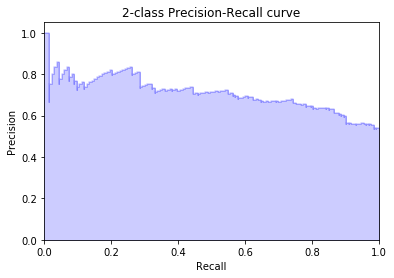

In [246]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, mean_squared_error
from sklearn.utils.fixes import signature

y_score = svclassifier.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
plt.title('2-class Precision-Recall curve')

In [247]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.74      0.68      0.71       146
        1.0       0.68      0.74      0.71       133

avg / total       0.71      0.71      0.71       279



In [248]:
mse = mean_squared_error(y_test,y_pred)
print('Test MSE: %.2f' % (mse))

Test MSE: 0.29
